In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/bray_curtis_variability.tsv", 
                 sep='\t', index_col=0)
df

,16S IBD,16S HC,ITS IBD,ITS HC
category,,,,
Diagnosis,2.1,NaN,1.1,NaN
Drug,1.8,NaN,2.7,NaN
Localization,6.8,NaN,9.9,NaN
Intestinal surgery,3.3,NaN,2.6,NaN
BMI,3.6,16.5,2.8,18.1
Sex,1.6,7.2,1.8,7.9
Smoker,2.2,5.2,1.8,5.4
Visit,1.2,2.1,7.1,10.1
Individual,44.5,42.7,6.3,4.7


In [3]:
df.sort_values(by=['16S HC'], inplace=True, ascending=False)
df

,16S IBD,16S HC,ITS IBD,ITS HC
category,,,,
Individual,44.5,42.7,6.3,4.7
Residuals,33.0,26.2,63.9,53.8
BMI,3.6,16.5,2.8,18.1
Sex,1.6,7.2,1.8,7.9
Smoker,2.2,5.2,1.8,5.4
Visit,1.2,2.1,7.1,10.1
Diagnosis,2.1,NaN,1.1,NaN
Drug,1.8,NaN,2.7,NaN
Localization,6.8,NaN,9.9,NaN


In [4]:
hc = df[['16S HC', 'ITS HC']]
hc.dropna(axis=0, inplace=True)
hc

<ipython-input-4-b393b300a39f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc.dropna(axis=0, inplace=True)


,16S HC,ITS HC
category,,
Individual,42.7,4.7
Residuals,26.2,53.8
BMI,16.5,18.1
Sex,7.2,7.9
Smoker,5.2,5.4
Visit,2.1,10.1


In [5]:
df.fillna(0, inplace=True)
df

,16S IBD,16S HC,ITS IBD,ITS HC
category,,,,
Individual,44.5,42.7,6.3,4.7
Residuals,33.0,26.2,63.9,53.8
BMI,3.6,16.5,2.8,18.1
Sex,1.6,7.2,1.8,7.9
Smoker,2.2,5.2,1.8,5.4
Visit,1.2,2.1,7.1,10.1
Diagnosis,2.1,0.0,1.1,0.0
Drug,1.8,0.0,2.7,0.0
Localization,6.8,0.0,9.9,0.0


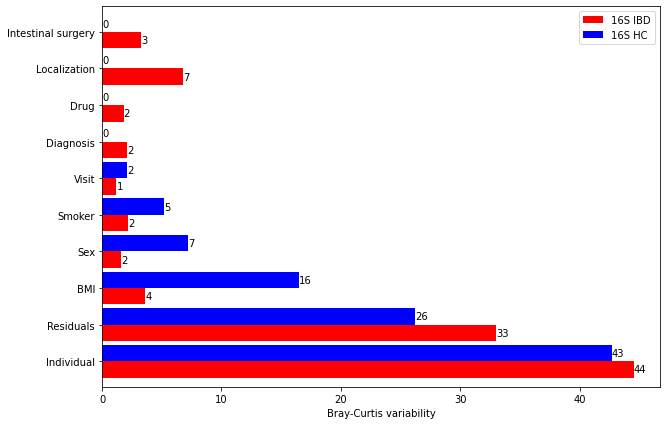

In [6]:
ax = df[['16S IBD', '16S HC']].plot(kind='barh', figsize=(10, 7), width=0.9, color=['red', 'blue'])
ax.set(xlabel='Bray-Curtis variability', ylabel='')
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.0f', label_type='edge')


#for index, value in enumerate(x):
#    plt.text(value, index, str(value))

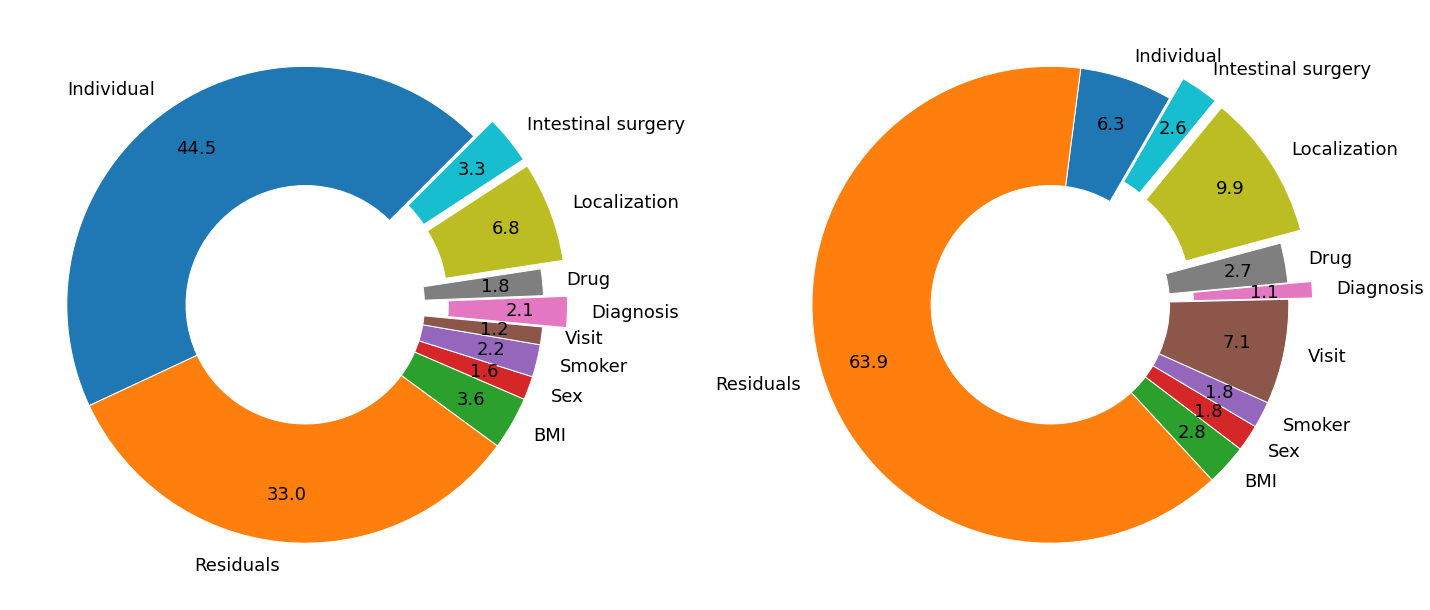

In [7]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
ax1.pie(df['16S IBD'], labels=df.index, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8, 
       startangle=45, explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1), textprops={'fontsize': 18})
ax2.pie(df['ITS IBD'], labels=df.index, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8, 
       startangle=60, explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1), textprops={'fontsize': 18})
plt.tight_layout()

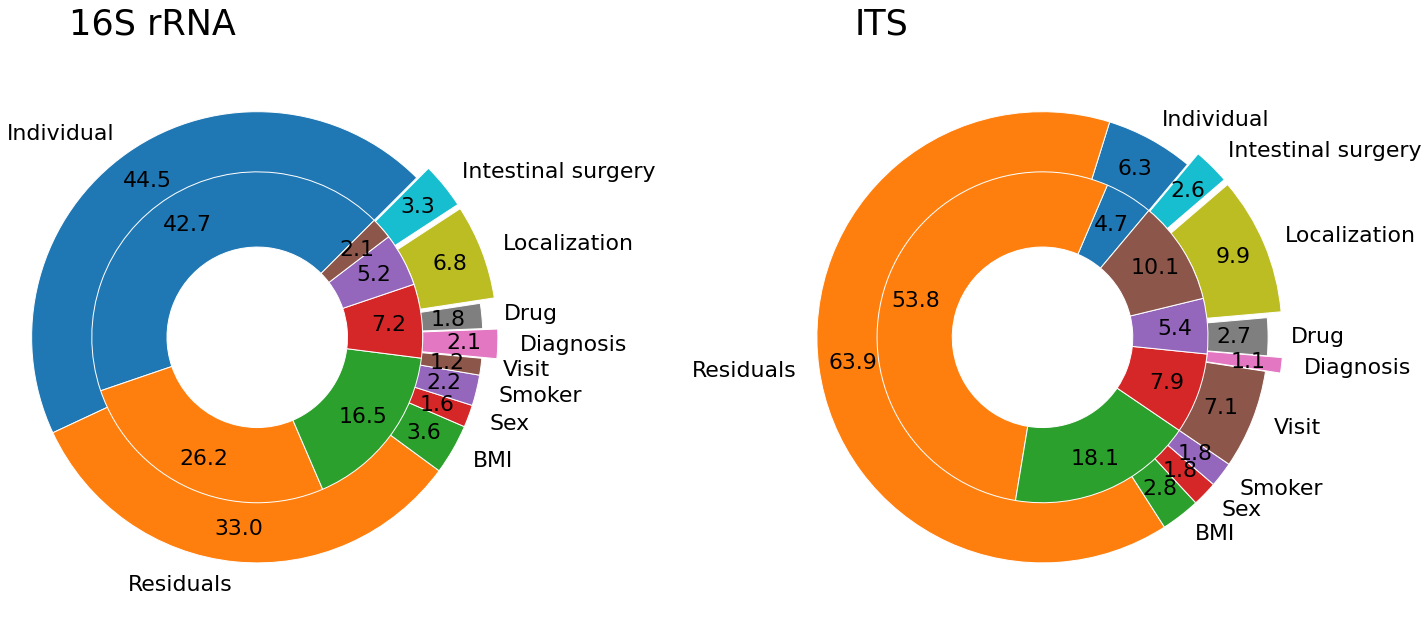

In [8]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))

#plot first ring and subring
ax1.axis('equal')
ax1.pie(df['16S IBD'], labels=df.index, radius=1.5, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.85, 
       startangle=45, explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1), textprops={'fontsize': 22})
ax1.pie(hc['16S HC'], radius=1.5-0.4, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8,
       startangle=45, textprops={'fontsize': 22})

#plot second ring and subring
ax2.axis('equal')
ax2.pie(df['ITS IBD'], labels=df.index, radius=1.5, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.85, 
       startangle=50, explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1), textprops={'fontsize': 22})
ax2.pie(hc['ITS HC'], radius=1.5-0.4, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8,
       startangle=50, textprops={'fontsize': 22})

# add titles
ax1.set_title("16S rRNA", fontsize=35, loc='left')
ax2.set_title("ITS", fontsize=35, loc='left')

plt.tight_layout()

fig2.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/bray_curtis_variability.png')


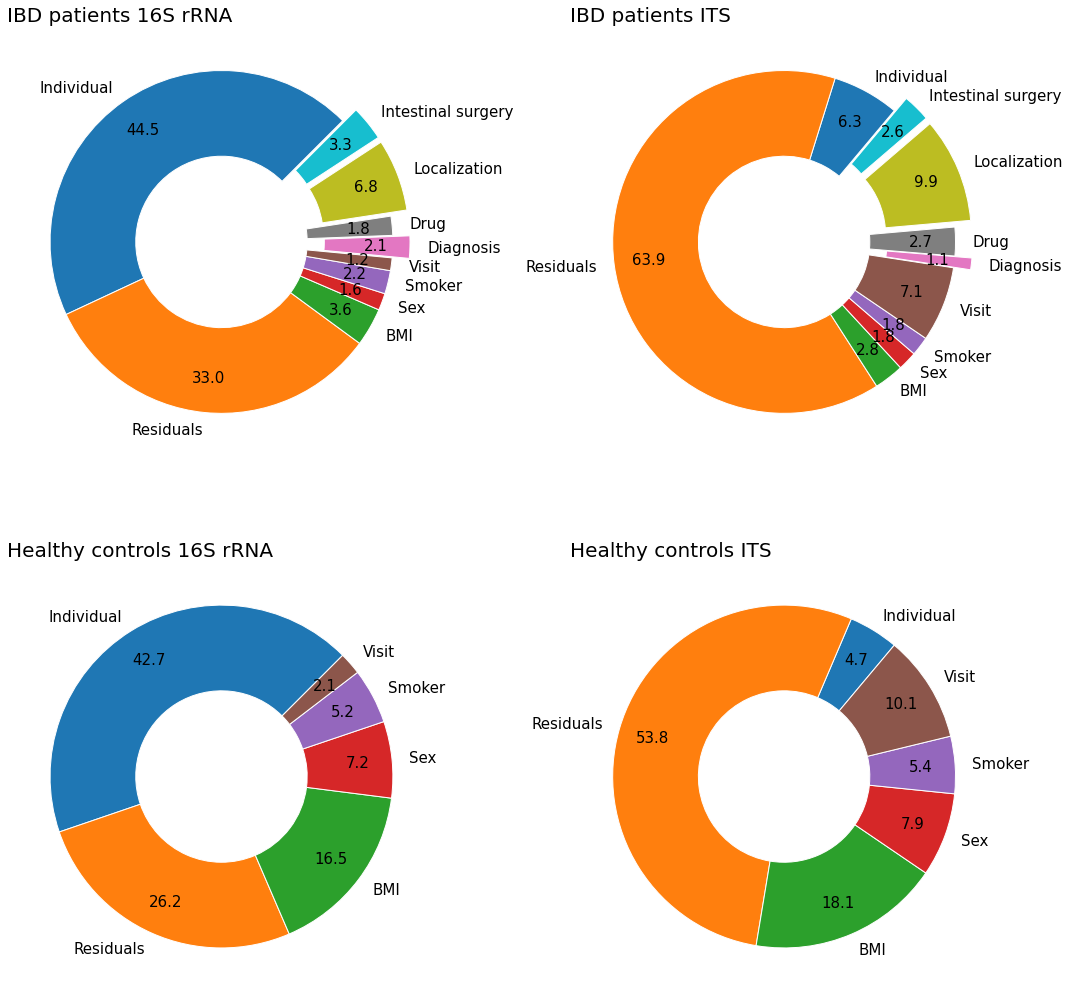

In [10]:
fig3, ax = plt.subplots(2,2, figsize=(15, 15))

ax[0,0].pie(df['16S IBD'], labels=df.index, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8, 
       startangle=45, explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1), textprops={'fontsize': 15})
ax[0,1].pie(df['ITS IBD'], labels=df.index, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8, 
       startangle=50, explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1), textprops={'fontsize': 15})
ax[1,0].pie(hc['16S HC'], labels=hc.index, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8, 
       startangle=45, explode = (0, 0, 0, 0, 0, 0), textprops={'fontsize': 15})
ax[1,1].pie(hc['ITS HC'], labels=hc.index, wedgeprops=dict(width=.5, edgecolor='w'), autopct='%.1f', pctdistance=0.8, 
       startangle=50, explode = (0, 0, 0, 0, 0, 0), textprops={'fontsize': 15})

ax[0,0].set_title("IBD patients 16S rRNA", fontsize=20, loc='left')
ax[0,1].set_title("IBD patients ITS", fontsize=20, loc='left')
ax[1,0].set_title("Healthy controls 16S rRNA", fontsize=20, loc='left')
ax[1,1].set_title("Healthy controls ITS", fontsize=20, loc='left')

plt.tight_layout()